<a href="https://colab.research.google.com/github/MakeThaClap/EstadisticaVerano/blob/main/PROYECTO_UNIDAD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/MakeThaClap/EstadisticaVerano/refs/heads/main/concrete_data.csv")
df


,Cemento,Escoria,Ceniza,Agua,Superlastificante,Agregrueso,Agrefino,Edad,Resistencia
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


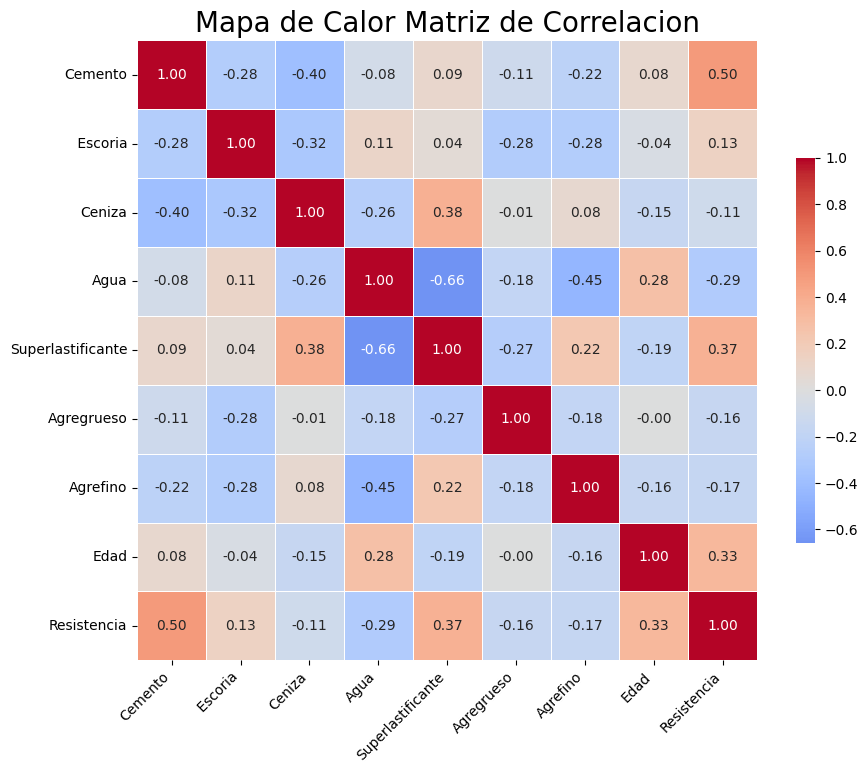

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(matriz_de_correlacion, #lo que va a grafica
    annot=True,#se muestran los valores en las celdas
    fmt="0.2f", #0.2f significa 2 decimales
    cmap="coolwarm", #paleta de colroes
    square=True,#forzar cuadrado
    linewidths=0.5,#grosor de lineas
    cbar_kws={"shrink":0.5}, #tama;o de barra lateral
    center=0, #linea vertical central
)
plt.title("Mapa de Calor Matriz de Correlacion",fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


In [ ]:
df.columns

Index(['Cemento', ' Escoria', 'Ceniza', 'Agua', 'Superlastificante',
       'Agregrueso', 'Agrefino', 'Edad', 'Resistencia'],
      dtype='object')

      Cemento   Escoria  Ceniza   Agua  Superlastificante  Agregrueso  \
0       540.0       0.0     0.0  162.0                2.5      1040.0   
1       540.0       0.0     0.0  162.0                2.5      1055.0   
2       332.5     142.5     0.0  228.0                0.0       932.0   
3       332.5     142.5     0.0  228.0                0.0       932.0   
4       198.6     132.4     0.0  192.0                0.0       978.4   
...       ...       ...     ...    ...                ...         ...   
1025    276.4     116.0    90.3  179.6                8.9       870.1   
1026    322.2       0.0   115.6  196.0               10.4       817.9   
1027    148.5     139.4   108.6  192.7                6.1       892.4   
1028    159.1     186.7     0.0  175.6               11.3       989.6   
1029    260.9     100.5    78.3  200.6                8.6       864.5   

      Agrefino  Edad  Resistencia  
0        676.0    28        79.99  
1        676.0    28        61.89  
2        594.0 

,df,sum_sq,mean_sq,F,PR(>F)
Resistencia,1.0,2.785264e+06,2.785264e+06,338.724341,1.324183e-65
Residual,1028.0,8.453042e+06,8.222804e+03,NaN,NaN


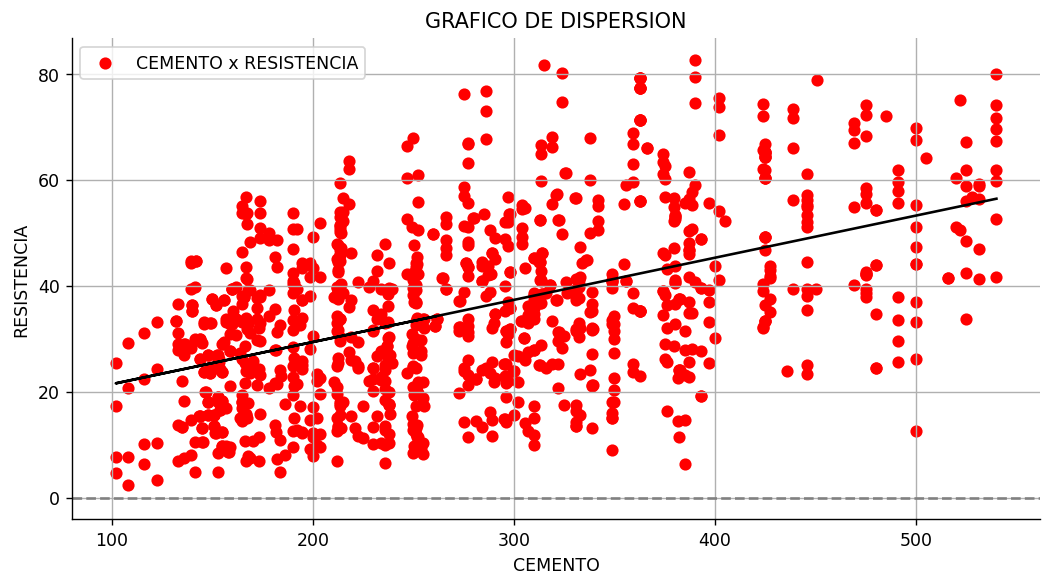

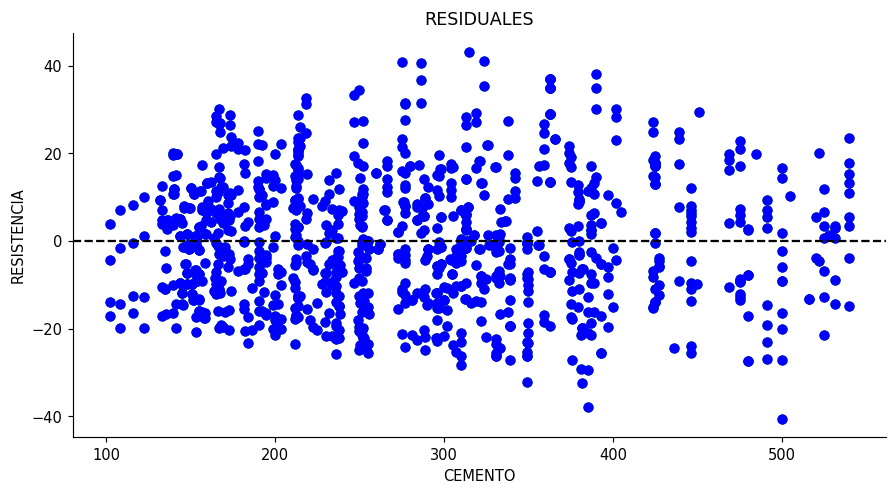

In [ ]:
x=df["Cemento"]
y=df["Resistencia"]
df.head(10)
print(df)
print("\n")

#REALIZAR UN DIAGRAMA DE DISPERSION PARA LOS DATOS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=125)
plt.scatter(x,y,
    label="CEMENTO x RESISTENCIA",
    color="RED")
plt.title("GRAFICO DE DISPERSION")
plt.xlabel("CEMENTO")
plt.ylabel("RESISTENCIA")
plt.axhline(y=0, color="GREY", linestyle="--")
plt.legend()
plt.grid()
df.head()
plt.gca().spines[["top","right"]].set_visible(False)

#3.- LOS DATOS SOPORTAN LA SUPOSICION DE LIENALIDAD
#NO

#4.- CALCULAR EL COEFICIENTE DE CORRELACION
from scipy.stats import pearsonr
r,_=pearsonr(x,y)
print( f"COEFICIENTE DE CORRELACION: {r: 0.4f}\n")

#6.- OBTENGA LA RECTA DE REGRESION AJUSTADA Y GRAFICAR SOBRE EL GRAFICO DE
#DISPERSION
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc=modelo.predict(x_constante)
plt.plot(x,yc, color="BLACK")

#5.- CALCULE EL COEFICIENTE DE DETERMINACION E INTERPRETE EL RESULTADO
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print( f"COEFICIENTE DE DETERMINACION: {r2: 0.4f} \n")

#7.-OBTENGA UN INTERVALO DE CONFIANZA DEL 95% PARA LA PENDIENTE DE LA RECTA DE
nivel_confianza= 0.95
intervalo_de_confianza=modelo.conf_int(alpha= 1 - nivel_confianza)
intervalo_de_confianza_b1=intervalo_de_confianza.iloc[1]
print(f"INTERVALO DE CONFIANZA DEL PARA b1 ES: {nivel_confianza:0.0%} \n")
print(f"{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f} \n")

#8.- CALCULE LOS RESIDUALES Y TRACE UN NUEVO GRAFICO DE DISPERSION. COMENTE,
# PARECE QUE SE VERIFICAN LOS SUPUESTOS
residuales= modelo.resid
plt.figure(figsize=(10,5),dpi=105)
plt.scatter(x,residuales, color="Green")
plt.title("RESIDUALES")
plt.xlabel("CEMENTO")
plt.ylabel("RESISTENCIA")
plt.axhline(y=0, color="grey", linestyle="--")
plt.scatter(x, residuales,
            label="CEMENTO",
            color="BLUE")
plt.axhline(y=0, color="BLACK", linestyle="--")
plt.gca().spines[["top","right"]].set_visible(False)

#9.- REALIZAR LA PRUEBA DE SHAPIRO PARA LOS RESIDUALES Y COMENTE EL RESULTADO
from scipy.stats import shapiro
estadistico_shapiro, valor_p_sh = shapiro(residuales)
print("valor_p_sh:", valor_p_sh )
print("\n")
if valor_p_sh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")

#10.-REALIZAR LA PRUEBA DE BREUSCHPAGAN PARA LOS RESIDUALES Y COMENTE LOS RESULTADOS
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print("valor_p_bp:", valor_p_bp)
print("\n")
if valor_p_bp<0.05:
  print("Hay heteroscedasticidad")
else:
  print("Hay homosedasticidad \n")

#11.- UTILIZA LA RECTA DE REGRESION PARA INTERPOLAR DOS VALORES Y EXTRAPOLAR UNO
#COMENTA LOS RESULTADOS
#print(f"Para x = 5, y = {modelo.predict([1,5])[0]}")
#print(f"Para x = 8, y = {modelo.predict([1,8])[0]}")
#print(f"Para x = 20, y = {modelo.predict([1,20])[0]}\n")\

#12.- REALIZAR TABLA ANOVA E INTERPRETAR EL RESULTADO
from statsmodels.formula.api import ols
modelo_lineal=ols(" Cemento ~ Resistencia", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_bp<0.05:
  print("No hay relacion entre X y Y")
else:
  print("Si hay relacion entre X y Y")
tabla_anova